### Codigo to find goalposts and the ball

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Reshape, Flatten, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD, Adam, RMSprop
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [3]:
import glob
import bisect
from os.path import basename
import xml.etree.ElementTree
import numpy as np
import cv2

In [4]:
def Reduzida25_skip(input_size, cosize):

    input_image = Input(shape=(input_size, cosize, 3))

    # Layer 1
    x = Conv2D(4, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
    x = BatchNormalization(name='norm_1')(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(8, (3,3), strides=(1,1), padding='same', name='conv_' + str(0+2), use_bias=False)(x)
    x = BatchNormalization(name='norm_' + str(0+2))(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    
        # Layer 2 - 5
    for i in range(1,4):
        x = Conv2D(4*(2**i), (3,3), strides=(1,1), padding='same', name='conv_' + str(i+2), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+2))(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # Layer 6
    x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
    x = BatchNormalization(name='norm_6')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same')(x)
    
    skip_connection = x

        # Layer 7 - 8
    for i in range(0,2):
        x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_' + str(i+7), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+7))(x)
        x = LeakyReLU(alpha=0.1)(x)
        
    skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_skip', use_bias=False)(skip_connection)
    skip_connection = BatchNormalization(name='norm_21')(skip_connection)
    skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
    #skip_connection = Lambda(space_to_depth_x2)(skip_connection)

    x = concatenate([skip_connection, x])
        
        
    x = Conv2D(5, (1,1), strides = (1,1), padding = 'same', name = 'conv_9', use_bias = True)(x)
        
    model = Model(inputs = input_image, outputs=x, name='Fast')
        
    
    return model

In [5]:
def minha2_skip_pequena(input_size, cosize):

    input_image = Input(shape=(input_size, cosize, 3))

    # Layer 1
    #Originalmente era quatro, mas coloquei oito
    x = Conv2D(8, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
    x = BatchNormalization(name='norm_1')(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    x = Conv2D(8*(2**0), (3,3), strides=(1,1), padding='same', name='conv_' + str(2), use_bias=False)(x)
    x = BatchNormalization(name='norm_' + str(2))(x)
    x = LeakyReLU(alpha=0.1)(x)
    
        # Layer 2 - 5
    for i in range(1,4):
        x = Conv2D(8*(2**i), (3,3), strides=(1,1), padding='same', name='conv_' + str(i+2), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+2))(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # Layer 6
    x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
    x = BatchNormalization(name='norm_6')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same')(x)
    
    skip_connection = x

        # Layer 7 - 8
    for i in range(0,2):
        x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_' + str(i+7), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+7))(x)
        x = LeakyReLU(alpha=0.1)(x)
        
    skip_connection = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_skip', use_bias=False)(skip_connection)
    skip_connection = BatchNormalization(name='norm_21')(skip_connection)
    skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
    #skip_connection = Lambda(space_to_depth_x2)(skip_connection)

    x = concatenate([skip_connection, x])
        
        
    x = Conv2D(5, (1,1), strides = (1,1), padding = 'same', name = 'conv_9', use_bias = True)(x)
        
    model = Model(inputs = input_image, outputs=x, name='Fast')
        
    
    return model

In [6]:
rede = minha2_skip_pequena(120,160)
rede.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 120, 160, 8)  216         input_1[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 120, 160, 8)  32          conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 120, 160, 8)  0           norm_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Co

In [7]:
pasta_atual = os.getcwd()

In [8]:
def Metodo(pasta):  #imagem em 1/4
    
    nomesdearquivos = glob.glob(pasta + '/*.xml')
    fotos = glob.glob(pasta + '/*.png')
    maisfotos = glob.glob(pasta+ '/*.jpg')
    for nome in maisfotos:
        fotos.append(nome)
    fotosjpeg = glob.glob(pasta + '/*.jpeg')
    for nome in fotosjpeg:
        fotos.append(nome)
    fotosJPG = glob.glob(pasta + '/*.JPG')
    for nome in fotosJPG:
        fotos.append(nome)
    nomesdearquivos.sort()
    fotos.sort()
    nomesdasanotacoes = list()
    for nomeindo in nomesdearquivos:
        bisect.insort(nomesdasanotacoes, basename(nomeindo).split('.')[0])
        
    
    para_imprimir = list()
    entrada = list()
    for nome in nomesdasanotacoes:
        e = xml.etree.ElementTree.parse(pasta+'/'+nome+'.xml').getroot()
        objects = e.findall('object')           
        
        resposta = np.zeros((15,20,5), dtype=float)
        
        ball = None
        goalpost = None
        goalpost_2 = None
        
        if objects is None:
            para_imprimir.append(resposta)
        else:
            tam = len(objects)
            for i in range(0, tam):
                if objects[i][0].text == 'ball':
                    ball = objects[i]
                elif objects[i][0].text == 'goalpost':
                    goalpost = objects[i]
                elif objects[i][0].text == 'goalpost_2':
                    goalpost_2 = objects[i]
            
            
        if ball is not None:
                
            ball_xmin = float(ball[4][0].text)/4
            ball_ymin = float(ball[4][1].text)/4
            ball_xmax = float(ball[4][2].text)/4
            ball_ymax = float(ball[4][3].text)/4
                
            ball_Xc = (ball_xmin + ball_xmax)/2
            ball_posicx = int((ball_Xc)/8)
            ball_Xc = ball_Xc - ball_posicx*8
            ball_Xc = ball_Xc/8
            ball_Yc = (ball_ymin + ball_ymax)/2
            ball_posicy = int((ball_Yc)/8)
            ball_Yc = ball_Yc - ball_posicy*8
            ball_Yc = ball_Yc/8
            ball_largura = (ball_xmax - ball_xmin)/160
            ball_altura = (ball_ymax - ball_ymin)/160
                
            resposta[ball_posicy][ball_posicx][0:5] = (1, ball_Xc, ball_Yc, ball_largura, ball_altura)
            
        '''              
        if goalpost is not None:
            
            goalpost_xmin = float(goalpost[4][0].text)/4
            goalpost_ymin = float(goalpost[4][1].text)/4
            goalpost_xmax = float(goalpost[4][2].text)/4
            goalpost_ymax = float(goalpost[4][3].text)/4
            
            goalpost_Xc = (goalpost_xmin + goalpost_xmax)/2
            goalpost_posicx = int((goalpost_Xc)/8)
            goalpost_Xc = goalpost_Xc - goalpost_posicx*8
            goalpost_Xc = goalpost_Xc/8
            goalpost_Yc = (goalpost_ymin + goalpost_ymax)/2
            goalpost_posicy = int((goalpost_Yc)/8)
            goalpost_Yc = goalpost_Yc - goalpost_posicy*8
            goalpost_Yc = goalpost_Yc/8
            goalpost_largura = (goalpost_xmax - goalpost_xmin)/160
            goalpost_altura = (goalpost_ymax - goalpost_ymin)/160
            
            resposta[goalpost_posicy][goalpost_posicx][5] = 1 #goalpost_Xc, goalpost_Yc)#, goalpost_largura, goalpost_altura)
            #Funcao de custo esta errada, pois assim deu certo. Alem disso, escolher outra forma de 
            #marcar a trave
        
        if goalpost_2 is not None:
            
            goalpost2_xmin = float(goalpost_2[4][0].text)/4
            goalpost2_ymin = float(goalpost_2[4][1].text)/4
            goalpost2_xmax = float(goalpost_2[4][2].text)/4
            goalpost2_ymax = float(goalpost_2[4][3].text)/4
            
            goalpost2_Xc = (goalpost2_xmin + goalpost2_xmax)/2
            goalpost2_posicx = int((goalpost2_Xc)/8)
            goalpost2_Xc = goalpost2_Xc - goalpost2_posicx*8
            goalpost2_Xc = goalpost2_Xc/8
            goalpost2_Yc = (goalpost2_ymin + goalpost2_ymax)/2
            goalpost2_posicy = int((goalpost2_Yc)/8)
            goalpost2_Yc = goalpost2_Yc - goalpost2_posicy*8
            goalpost2_Yc = goalpost2_Yc/8
            
            resposta[goalpost2_posicy][goalpost2_posicx][6] = 1 #, goalpost_Xc, goalpost_Yc)#, goalpost_largura, goalpost_altura)
            #Funcao de custo esta errada, pois assim deu certo. Alem disso, escolher outra forma de 
            #marcar a trave
        '''
        para_imprimir.append(resposta)
        
    Y = np.array(para_imprimir)

    for arquivo in fotos:
        img = cv2.imread(arquivo)
        img = cv2.resize(img, (160,120), interpolation = cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        entrada.append(img)
        
    
    X = np.array(entrada)
    X = X.astype(float)
    X = X/255
    
    return X, Y


In [9]:
def Metodo2(pasta):  #imagem em 1/4
    
    nomesdearquivos = glob.glob(pasta + '/*.xml')
    fotos = glob.glob(pasta + '/*.png')
    maisfotos = glob.glob(pasta+ '/*.jpg')
    for nome in maisfotos:
        fotos.append(nome)
    fotosjpeg = glob.glob(pasta + '/*.jpeg')
    for nome in fotosjpeg:
        fotos.append(nome)
    fotosJPG = glob.glob(pasta + '/*.JPG')
    for nome in fotosJPG:
        fotos.append(nome)
    nomesdearquivos.sort()
    fotos.sort()
    nomesdasanotacoes = list()
    for nomeindo in nomesdearquivos:
        bisect.insort(nomesdasanotacoes, basename(nomeindo).split('.')[0])
        
    
    para_imprimir = list()
    entrada = list()
    for nome in nomesdasanotacoes:
        e = xml.etree.ElementTree.parse(pasta+'/'+nome+'.xml').getroot()
        objects = e.findall('object')           
        
        resposta = np.zeros((15,20,6), dtype=float)
        
        ball = None
        goalpost = None
        goalpost_2 = None
        
        if objects is None:
            para_imprimir.append(resposta)
        else:
            tam = len(objects)
            for i in range(0, tam):
                if objects[i][0].text == 'ball':
                    ball = objects[i]
                elif objects[i][0].text == 'goalpost':
                    goalpost = objects[i]
                elif objects[i][0].text == 'goalpost_2':
                    goalpost_2 = objects[i]

                    
        if ball is not None:
                
            ball_xmin = float(ball[4][0].text)/4
            ball_ymin = float(ball[4][1].text)/4
            ball_xmax = float(ball[4][2].text)/4
            ball_ymax = float(ball[4][3].text)/4
                
            ball_Xc = (ball_xmin + ball_xmax)/2
            ball_posicx = int((ball_Xc)/8)
            ball_Xc = ball_Xc - ball_posicx*8
            ball_Xc = ball_Xc/8
            ball_Yc = (ball_ymin + ball_ymax)/2
            ball_posicy = int((ball_Yc)/8)
            ball_Yc = ball_Yc - ball_posicy*8
            ball_Yc = ball_Yc/8
            ball_largura = (ball_xmax - ball_xmin)/160
            ball_altura = (ball_ymax - ball_ymin)/160
                
            resposta[ball_posicy][ball_posicx][0:5] = (1, ball_Xc, ball_Yc, ball_largura, ball_altura)
            
                      
        if goalpost is not None:
            
            goalpost_xmin = float(goalpost[4][0].text)/4
            goalpost_ymin = float(goalpost[4][1].text)/4
            goalpost_xmax = float(goalpost[4][2].text)/4
            goalpost_ymax = float(goalpost[4][3].text)/4
            
            goalpost_Xc = (goalpost_xmin + goalpost_xmax)/2
            goalpost_posicx = int((goalpost_Xc)/8)
            goalpost_Xc = goalpost_Xc - goalpost_posicx*8
            goalpost_Xc = goalpost_Xc/8
            goalpost_Yc = (goalpost_ymin + goalpost_ymax)/2
            goalpost_posicy = int((goalpost_Yc)/8)
            goalpost_Yc = goalpost_Yc - goalpost_posicy*8
            goalpost_Yc = goalpost_Yc/8
            goalpost_largura = (goalpost_xmax - goalpost_xmin)/160
            goalpost_altura = (goalpost_ymax - goalpost_ymin)/160
            
            resposta[goalpost_posicy][goalpost_posicx][5] = 1 #goalpost_Xc, goalpost_Yc)#, goalpost_largura, goalpost_altura)
            #Funcao de custo esta errada, pois assim deu certo. Alem disso, escolher outra forma de 
            #marcar a trave
        
        if goalpost_2 is not None:
            
            goalpost2_xmin = float(goalpost_2[4][0].text)/4
            goalpost2_ymin = float(goalpost_2[4][1].text)/4
            goalpost2_xmax = float(goalpost_2[4][2].text)/4
            goalpost2_ymax = float(goalpost_2[4][3].text)/4
            
            goalpost2_Xc = (goalpost2_xmin + goalpost2_xmax)/2
            goalpost2_posicx = int((goalpost2_Xc)/8)
            goalpost2_Xc = goalpost2_Xc - goalpost2_posicx*8
            goalpost2_Xc = goalpost2_Xc/8
            goalpost2_Yc = (goalpost2_ymin + goalpost2_ymax)/2
            goalpost2_posicy = int((goalpost2_Yc)/8)
            goalpost2_Yc = goalpost2_Yc - goalpost2_posicy*8
            goalpost2_Yc = goalpost2_Yc/8
            
            resposta[goalpost2_posicy][goalpost2_posicx][5] = 1 #, goalpost_Xc, goalpost_Yc)#, goalpost_largura, goalpost_altura)
            #Funcao de custo esta errada, pois assim deu certo. Alem disso, escolher outra forma de 
            #marcar a trave
        
        para_imprimir.append(resposta)
        
    Y = np.array(para_imprimir)

    for arquivo in fotos:
        img = cv2.imread(arquivo)
        img = cv2.resize(img, (160,120), interpolation = cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        entrada.append(img)
        
    
    X = np.array(entrada)
    X = X.astype(float)
    X = X/255
    
    return X, Y

In [10]:
x , y = Metodo(pasta_atual +'/Conjunto de treino/Aumento de brilho')
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-evaluation-640x480')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (500, 120, 160, 3))
('Foramto do Y', (500, 15, 20, 5))


In [11]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-germanopen-640x480')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (717, 120, 160, 3))
('Foramto do Y', (717, 15, 20, 5))


In [12]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-iran-640-480')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (920, 120, 160, 3))
('Foramto do Y', (920, 15, 20, 5))


In [13]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-leipzig-640-360')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (1564, 120, 160, 3))
('Foramto do Y', (1564, 15, 20, 5))


In [14]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-montreal')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (1985, 120, 160, 3))
('Foramto do Y', (1985, 15, 20, 5))


In [15]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-nagoya2-640-480')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (3001, 120, 160, 3))
('Foramto do Y', (3001, 15, 20, 5))


In [16]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-nagoya-640-480')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (4466, 120, 160, 3))
('Foramto do Y', (4466, 15, 20, 5))


In [17]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/bitbots-set09-640-480')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (5466, 120, 160, 3))
('Foramto do Y', (5466, 15, 20, 5))


In [18]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/Motion_blur')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (5711, 120, 160, 3))
('Foramto do Y', (5711, 15, 20, 5))


In [19]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/Mudanca de cor_1')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (6081, 120, 160, 3))
('Foramto do Y', (6081, 15, 20, 5))


In [20]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/Mudanca de cor_2')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (6266, 120, 160, 3))
('Foramto do Y', (6266, 15, 20, 5))


In [21]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/Mudanca de cor_3')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (6372, 120, 160, 3))
('Foramto do Y', (6372, 15, 20, 5))


In [22]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/Reducao de brilho')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (6687, 120, 160, 3))
('Foramto do Y', (6687, 15, 20, 5))


In [23]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/Training_filtrado')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (8604, 120, 160, 3))
('Foramto do Y', (8604, 15, 20, 5))


In [24]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup2018')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (8737, 120, 160, 3))
('Foramto do Y', (8737, 15, 20, 5))


In [25]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup2018_2')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (9027, 120, 160, 3))
('Foramto do Y', (9027, 15, 20, 5))


In [26]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup_cor_1')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (9160, 120, 160, 3))
('Foramto do Y', (9160, 15, 20, 5))


In [27]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup_cor_2')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (9450, 120, 160, 3))
('Foramto do Y', (9450, 15, 20, 5))


In [28]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup_cor_3')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (9583, 120, 160, 3))
('Foramto do Y', (9583, 15, 20, 5))


In [29]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup_mais_brilho')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (9873, 120, 160, 3))
('Foramto do Y', (9873, 15, 20, 5))


In [30]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup_menos_brilho')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (10163, 120, 160, 3))
('Foramto do Y', (10163, 15, 20, 5))


In [31]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup_motion_blur')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (10296, 120, 160, 3))
('Foramto do Y', (10296, 15, 20, 5))


In [32]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup2018_4')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (10874, 120, 160, 3))
('Foramto do Y', (10874, 15, 20, 5))


In [33]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/do iPad')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (11207, 120, 160, 3))
('Foramto do Y', (11207, 15, 20, 5))


In [34]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/do iPad_maisbrilho')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (11547, 120, 160, 3))
('Foramto do Y', (11547, 15, 20, 5))


In [35]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/do iPad_menosbrilho')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (11887, 120, 160, 3))
('Foramto do Y', (11887, 15, 20, 5))


In [ ]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup2018_7')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

('Formato do X', (12134, 120, 160, 3))
('Foramto do Y', (12134, 15, 20, 5))


In [ ]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup2018_8')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

In [ ]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/robocup2018_10')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

In [ ]:
x1, y1 = Metodo(pasta_atual +'/Conjunto de treino/novo_brilho')
x = np.concatenate((x,x1), axis=0)
y = np.concatenate((y,y1), axis=0)
x1 = None
y1 = None
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

In [ ]:
x_val, y_val = Metodo(pasta_atual +'/Validation set')
print("Formato do X_val", x_val.shape)
print("Foramto do Y_val", y_val.shape)

In [41]:
def lucas_loss(y_true, y_pred):
    Xc_true = y_true[...,1]
    Xc_pred = tf.sigmoid(y_pred[..., 1])        ##mudei aqui
    Yc_true = y_true[..., 2]
    Yc_pred = tf.sigmoid(y_pred[..., 2])        ##mudei aqui
    W_true = tf.sqrt(tf.abs(y_true[...,3]))
    H_true = tf.sqrt(tf.abs(y_true[...,4]))
    #WH_pred = tf.sqrt(tf.abs(y_pred[..., 3:5]))
    WH_pred = tf.sqrt(tf.abs(tf.exp(y_pred[..., 3:5])*np.reshape(ANCHORS, [1,1,BOX,2])))
    W_pred = WH_pred[...,0]
    H_pred = WH_pred[...,1]
    confidence_true = y_true[...,0]
    confidence_pred = tf.sigmoid(y_pred[...,0])
    class_true = y_true[...,0]
    
    Xc_pred = tf.multiply(class_true,Xc_pred)
    Yc_pred = tf.multiply(class_true, Yc_pred)
    H_pred = tf.multiply(class_true, H_pred)
    W_pred = tf.multiply(class_true, W_pred)
    
    loss_xy = (tf.square(Xc_pred - Xc_true) + tf.square(Yc_pred - Yc_true))
    loss_xy = 5*tf.reduce_sum(loss_xy)
    
    #W_pred = tf.cast(W_pred, dtype = 'float32')
    #W_true = tf.cast(W_true, dtype = 'float32')
    #H_pred = tf.cast(H_pred, dtype = 'float32')
    #H_true = tf.cast(H_true, dtype = 'float32')
    #W_dif = tf.square(tf.sqrt(tf.abs(W_pred)) - tf.sqrt(tf.abs(W_true)))
    #H_dif = tf.square(tf.sqrt(tf.abs(H_true)) - tf.sqrt(tf.abs(H_pred)))
    loss_wh = (tf.square(W_true - W_pred) + tf.square(H_pred - H_true))
    loss_wh = 20*tf.reduce_sum(loss_wh)  #era 10
    
    no_object = 1 - class_true
    diff_conf = tf.square(confidence_true - confidence_pred)
    loss_no_object = (tf.multiply(diff_conf, no_object))
    loss_no_object = 10*tf.reduce_sum(loss_no_object)  #era 0.5
    
    loss_object = 50*tf.reduce_sum(tf.multiply(class_true, diff_conf)) #era 5
    
    #loss_class = tf.nn.sigmoid_cross_entropy_with_logits(labels = class_true, logits = class_pred)
    #loss_class = tf.reduce_sum(loss_class)
    
    loss = loss_xy + loss_wh + loss_no_object + loss_object #+ loss_class
    
    
    return loss

In [42]:
def ball_goalpost_loss2(y_true, y_pred):
    Xc_true = y_true[...,1]
    Xc_pred = tf.sigmoid(y_pred[..., 1])        ##mudei aqui
    Yc_true = y_true[..., 2]
    Yc_pred = tf.sigmoid(y_pred[..., 2])        ##mudei aqui
    W_true = tf.sqrt(tf.abs(y_true[...,3]))
    H_true = tf.sqrt(tf.abs(y_true[...,4]))
    #WH_pred = tf.sqrt(tf.abs(y_pred[..., 3:5]))
    WH_pred = tf.sqrt(tf.abs(tf.exp(y_pred[..., 3:5])*np.reshape(ANCHORS, [1,1,BOX,2])))
    W_pred = WH_pred[...,0]
    H_pred = WH_pred[...,1]
    confidence_true = y_true[...,0]
    confidence_pred = tf.sigmoid(y_pred[...,0])
    class_true = y_true[...,0]
    
    confidence_true_post = y_true[...,5]
    #confidence_true_post2 = y_true[...,6]
    confidence_pred_post = tf.sigmoid(y_pred[...,5])
    #confidence_pred_post2 = tf.sigmoid(y_pred[...,6])
    class_true_post = y_true[...,5]
    #class_true_post2 = y_true[...,6]
    
    
    Xc_pred = tf.multiply(class_true,Xc_pred)
    Yc_pred = tf.multiply(class_true, Yc_pred)
    H_pred = tf.multiply(class_true, H_pred)
    W_pred = tf.multiply(class_true, W_pred)
    
    loss_xy = (tf.square(Xc_pred - Xc_true) + tf.square(Yc_pred - Yc_true))
    loss_xy = 5*tf.reduce_sum(loss_xy)
    
    
    loss_wh = (tf.square(W_true - W_pred) + tf.square(H_pred - H_true))
    loss_wh = 20*tf.reduce_sum(loss_wh)  #era 10
    
    no_object = 1 - class_true
    diff_conf = tf.square(confidence_true - confidence_pred)
    loss_no_object = (tf.multiply(diff_conf, no_object))
    loss_no_object = 10*tf.reduce_sum(loss_no_object)  #era 0.5
    
    loss_object = 50*tf.reduce_sum(tf.multiply(class_true, diff_conf)) #era 5
    
    
    no_object_post = 1 - class_true_post
    diff_conf_post = tf.square(confidence_true_post - confidence_pred_post)
    loss_no_object_post = (tf.multiply(diff_conf_post, no_object_post))
    loss_no_object_post = 10*tf.reduce_sum(loss_no_object_post)  #era 0.5
    
    loss_object_post = 50*tf.reduce_sum(tf.multiply(class_true_post, diff_conf_post)) #era 5
    
    
    #no_object_post2 = 1 - class_true_post2
    #diff_conf_post2 = tf.square(confidence_true_post2 - confidence_pred_post2)
    #loss_no_object_post2 = (tf.multiply(diff_conf_post2, no_object_post2))
    #loss_no_object_post2 = 10*tf.reduce_sum(loss_no_object_post2)  #era 0.5
    
    #loss_object_post2 = 50*tf.reduce_sum(tf.multiply(class_true_post2, diff_conf_post2))
    
    
    #loss_class = tf.nn.sigmoid_cross_entropy_with_logits(labels = class_true, logits = class_pred)
    #loss_class = tf.reduce_sum(loss_class)
    
    loss = loss_xy + loss_wh + loss_no_object + loss_object + loss_no_object_post + loss_object_post #+ loss_no_object_post2 + loss_object_post2 #+ loss_class
    
    
    return loss

In [43]:
import keras
callbacks = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01,patience=1, verbose=0, mode='auto')

In [44]:
optimizer = Adam (lr=0.5e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#optimizer = SGD(lr=1e-4, decay=0.0005, momentum=0.9)
#optimizer = RMSprop(lr=1e-4, rho=0.9, epsilon=1e-08, decay=0.0)
from keras.losses import mean_squared_error

BATCH_SIZE = 2
ANCHORS = [5,5]
BOX = 1
CLASS_WEIGHTS    = np.ones(1, dtype='float32')
COORD_SCALE      = 1.0
OBJECT_SCALE     = 1.0
NO_OBJECT_SCALE  = 1.0
CLASS_SCALE      = 1.0
WARM_UP_BATCHES  = 0
OBJ_THRESHOLD    = 0.5
NMS_THRESHOLD    = 0.5


rede.compile(loss=lucas_loss, optimizer=optimizer)


rede.fit(x, y,validation_data=(x_val,y_val),epochs=100, batch_size=4) #NAO SE ESQUECER DE COLOCAR VALIDATION SET, validation
#existe tambem o validation split
rede.compile(loss=mean_squared_error, optimizer='sgd', metrics = ['accuracy'])
rede.save(pasta_atual+ '/IC_Final/2xskip_100_Epochs.hdf5')

Train on 12665 samples, validate on 1173 samples
Epoch 1/100
12665/12665 [==============================] - 340s 27ms/step - loss: 166.8403 - val_loss: 95.4709
Epoch 2/100
12665/12665 [==============================] - 314s 25ms/step - loss: 54.3260 - val_loss: 78.6603
Epoch 3/100
12665/12665 [==============================] - 314s 25ms/step - loss: 40.9801 - val_loss: 66.9265
Epoch 4/100
12665/12665 [==============================] - 315s 25ms/step - loss: 34.5605 - val_loss: 64.3969
Epoch 5/100
12665/12665 [==============================] - 324s 26ms/step - loss: 30.1987 - val_loss: 63.0345
Epoch 6/100
12665/12665 [==============================] - 317s 25ms/step - loss: 26.8821 - val_loss: 60.9941
Epoch 7/100
12665/12665 [==============================] - 317s 25ms/step - loss: 24.4280 - val_loss: 55.9051
Epoch 8/100
12665/12665 [==============================] - 317s 25ms/step - loss: 22.2490 - val_loss: 59.8634
Epoch 9/100
12665/12665 [==============================] - 317s 25ms/s

In [45]:
rede = None
rede = minha2_skip_pequena(120,160)
rede.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 120, 160, 8)  216         input_2[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 120, 160, 8)  32          conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_10 (LeakyReLU)      (None, 120, 160, 8)  0           norm_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Co

In [46]:
optimizer = Adam (lr=0.5e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#optimizer = SGD(lr=1e-4, decay=0.0005, momentum=0.9)
#optimizer = RMSprop(lr=1e-4, rho=0.9, epsilon=1e-08, decay=0.0)
from keras.losses import mean_squared_error

BATCH_SIZE = 2
ANCHORS = [5,5]
BOX = 1
CLASS_WEIGHTS    = np.ones(1, dtype='float32')
COORD_SCALE      = 1.0
OBJECT_SCALE     = 1.0
NO_OBJECT_SCALE  = 1.0
CLASS_SCALE      = 1.0
WARM_UP_BATCHES  = 0
OBJ_THRESHOLD    = 0.5
NMS_THRESHOLD    = 0.5


rede.compile(loss=lucas_loss, optimizer=optimizer)


rede.fit(x, y,validation_data=(x_val,y_val),epochs=30, batch_size=4) #NAO SE ESQUECER DE COLOCAR VALIDATION SET, validation
#existe tambem o validation split
rede.compile(loss=mean_squared_error, optimizer='sgd', metrics = ['accuracy'])
rede.save(pasta_atual+ '/IC_Final/2xskip_30_Epochs.hdf5')

Train on 12665 samples, validate on 1173 samples
Epoch 1/30
12665/12665 [==============================] - 315s 25ms/step - loss: 176.3885 - val_loss: 93.8038
Epoch 2/30
12665/12665 [==============================] - 314s 25ms/step - loss: 55.6267 - val_loss: 71.4113
Epoch 3/30
12665/12665 [==============================] - 314s 25ms/step - loss: 42.1749 - val_loss: 63.2165
Epoch 4/30
12665/12665 [==============================] - 314s 25ms/step - loss: 34.3038 - val_loss: 60.4999
Epoch 5/30
12665/12665 [==============================] - 314s 25ms/step - loss: 29.5881 - val_loss: 57.4493
Epoch 6/30
12665/12665 [==============================] - 314s 25ms/step - loss: 26.3359 - val_loss: 54.6444
Epoch 7/30
12665/12665 [==============================] - 314s 25ms/step - loss: 23.4034 - val_loss: 57.1066
Epoch 8/30
12665/12665 [==============================] - 314s 25ms/step - loss: 21.2528 - val_loss: 51.3850
Epoch 9/30
12665/12665 [==============================] - 314s 25ms/step - los

## To run the neural network, start here

In [1]:
from keras.models import load_model
from keras import layers
import os
import cv2
from matplotlib.pyplot import imshow
import numpy as np
import time

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
ANCHORS = [5,5]
BOX = 1

Using TensorFlow backend.


In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(np.negative(x)))

In [3]:
def respostafinal(Y):
    Y = np.reshape(Y, (15,20,7))
    classe = sigmoid(Y[...,0])
    pe1 = sigmoid(Y[...,5])
    pe2 = sigmoid(Y[...,6])
    i,j = np.unravel_index(np.argmax(classe), np.shape(classe))
    ipe1,jpe1 = np.unravel_index(np.argmax(pe1), np.shape(pe1))
    ipe2,jpe2 = np.unravel_index(np.argmax(pe2), np.shape(pe2))
    resposta = Y[i,j, 0:5]
    resposta[0] = sigmoid(resposta[0])
    resposta[1:3] = sigmoid(resposta[1:3])
    resposta[3:5] = (np.exp(resposta[3:5]))*np.reshape(ANCHORS, [1,1,BOX,2])
    respostape1 = Y[ipe1,jpe1,5]
    respostape2 = Y[ipe2,jpe2,6]
    respostape1 = sigmoid(respostape1)
    respostape2 = sigmoid(respostape2)
    return resposta, j, i,respostape1, jpe1, ipe1, respostape2, jpe2, ipe2

In [4]:
def respostafinal2(Y):
    Y = np.reshape(Y, (15,20,6))
    classe = sigmoid(Y[...,0])
    pe = sigmoid(Y[...,5])
    i,j = np.unravel_index(np.argmax(classe), np.shape(classe))
    ipe1,jpe1 = np.unravel_index(np.argmax(pe), np.shape(pe))
    pe[ipe1, jpe1] = -6
    ipe2,jpe2 = np.unravel_index(np.argmax(pe), np.shape(pe))
    resposta = Y[i,j, 0:5]
    resposta[0] = sigmoid(resposta[0])
    resposta[1:3] = sigmoid(resposta[1:3])
    resposta[3:5] = (np.exp(resposta[3:5]))*np.reshape(ANCHORS, [1,1,BOX,2])
    respostape1 = Y[ipe1,jpe1,5]
    respostape2 = Y[ipe2,jpe2,5]
    respostape1 = sigmoid(respostape1)
    respostape2 = sigmoid(respostape2)
    return resposta, j, i,respostape1, jpe1, ipe1, respostape2, jpe2, ipe2

In [5]:
def arrumando25(res, i ,j ,res1, i1, j1, res2, i2, j2):
    probabilidade = res[0]
    Xc = (res[1] + i*4)*8
    Yc = (res[2] + j*4)*8
    H = res[4]*640
    W = res[3]*640
    probabilidade1 = res1
    Xc1 = i1*32
    Yc1 = j1*32
    probabilidade2 = res2
    Xc2 = i2*32
    Yc2 = j2*32
    vetor = [probabilidade, Xc, Yc, W, H, probabilidade1, Xc1, Yc1, probabilidade2, Xc2, Yc2]
    return vetor

In [6]:
def plotarimagem(resposta, image):
    Xc = int(resposta[1])
    Yc = int(resposta[2])
    largura = resposta[3]
    altura = resposta[4]
    
    Xc1 = int(resposta[6])
    Yc1 = int(resposta[7])
    
    Xc2 = int(resposta[9])
    Yc2 = int(resposta[10])
    
    cv2.rectangle(image, (Xc1, Yc1), (Xc1+32, Yc1+32), [255, 0, 0], 5)
    cv2.rectangle(image, (Xc2, Yc2), (Xc2+32, Yc2+32), [0, 255, 0], 5)
    
    XMAX = int(2*Xc + largura)/2
    XMIN = int(2*Xc - largura)/2
    YMAX = int(2*Yc + altura)/2
    YMIN = int(2*Yc - altura)/2
    
    cv2.rectangle(image, (XMIN,YMIN), (XMAX, YMAX), [0,0, 255], 5)
    cv2.rectangle(image, (Xc, Yc), (Xc+2, Yc+2), [123, 70, 0], 20)
    
    #cv2.imwrite(pasta_atual + '/apresentacao.jpg', img)
    image = image/255
    imshow(image)

## Import an image and estimate the result

Pay attention to the image's file

Pay attention to the neural network to be loaded

In [7]:
pasta_atual = os.getcwd()
yolo = load_model(pasta_atual+ '/Robocup/Um_Treino(4)_Reduzida25.hdf5')

[0.98051298, 389.93970060348511, 357.1449728012085, 286.72906875610352, 222.44136810302734, 0.0046255536145960157, 576, 0, 0.002614055815133411, 576, 128]
0.101495981216


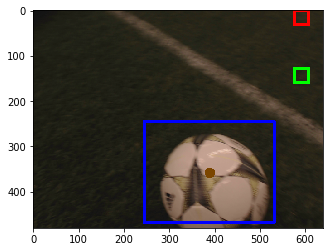

In [8]:
img = cv2.imread(pasta_atual + '/teste.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img);
ima = cv2.resize(img, (160,120), interpolation = cv2.INTER_AREA)
ima = ima.astype(float)
img = img.astype(float)
ima = ima/255
ima = np.reshape(ima, (1, 120, 160, 3))


start1 = time.time()
resposta = yolo.predict(ima)
#end1 = time.time()

#start2 = time.time()
a1, b1,c1, a2, b2, c2, a3, b3, c3 = respostafinal2(resposta)
resposta = arrumando25(a1,b1,c1, a2, b2, c2, a3, b3, c3)
end2 = time.time()

print(resposta)
#resposta[4] = resposta[4]-1000
plotarimagem(resposta, img)
print(end2-start1)
#print(end2-start2)